# 4. Moment Tensor Inversion using `MTtime`

Now we can start the inversion using the 1) data and 2) synthetics we prepared, and 3) the inversion input file we created.


In [1]:
import mttime

In [5]:
# 4.1 Edit the file `mtinv.in`

# First you can edit the file `mtinv.in`


In [7]:
# 4.2 Do the inversion
#   Pass the parameters to the Inversion object and launch the inversion
#   The default is to plot all solutions

# Call the Configure object to read the input file and set up the inversion
config = mttime.Configure(path_to_file="mtinv.in")
print(config)


       event: {'datetime': '2019-10-15T05:33:42.810000Z', 'longitude': -122.057, 'latitude': 37.938}
       depth: [10.0, 20.0, 30.0, 40.0, 50.0]
       green: herrmann
  components: ['Z', 'R', 'T']
      degree: 5
      weight: distance
        plot: False
   correlate: False

| STATION TABLE |
   station  distance  azimuth  ts  npts   dt  Z  R  T  longitude  latitude
BK.MTOS.00     80.27   126.56  30   150 1.00  1  1  1    -121.33     37.50
BK.FARB.00     87.30   252.51  30   150 1.00  1  1  1    -123.00     37.70
BK.MNRC.00    109.73   342.24  30   150 1.00  1  1  1    -122.44     38.88


In [8]:
tdmt = mttime.Inversion(config=config)
tdmt.invert()

Deviatoric Moment Tensor Inversion
Depth = 10.0000 km
Mw = 4.62
Percent DC/CLVD/ISO = 82/18/0
VR = 76.57%

Deviatoric Moment Tensor Inversion
Depth = 20.0000 km
Mw = 4.69
Percent DC/CLVD/ISO = 78/22/0
VR = 77.76%

Deviatoric Moment Tensor Inversion
Depth = 30.0000 km
Mw = 4.76
Percent DC/CLVD/ISO = 71/29/0
VR = 76.85%

Deviatoric Moment Tensor Inversion
Depth = 40.0000 km
Mw = 4.81
Percent DC/CLVD/ISO = 68/32/0
VR = 74.71%

Deviatoric Moment Tensor Inversion
Depth = 50.0000 km
Mw = 4.84
Percent DC/CLVD/ISO = 69/31/0
VR = 71.71%



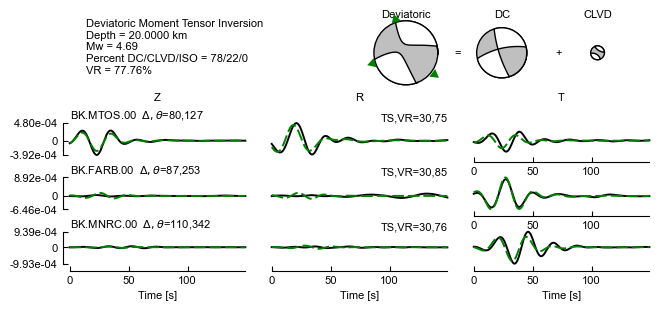

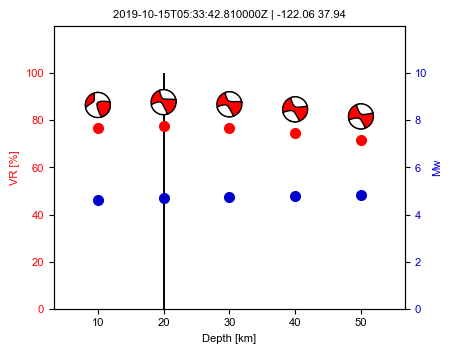

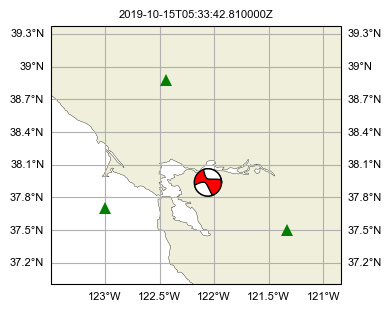

In [9]:
# 4.3 Plot figures for the inversion results.

#   `view="waveform"` to show the solution and waveform fits.
#   `view="depth"` to show solution as a function of source depth.
#   `view="map"` plots solution on a map.
#   `view="lune"` plots the full moment tensor source-type on a lune.
#
#    To save figure to file set show=False

# Plot waveform fits of the best solution (highest VR)
tdmt.plot(view="waveform", option="preferred", show=True)
tdmt.plot(view="depth", show=True)
tdmt.plot(view="map", show=True)

# Save the plots
#tdmt.plot(view="waveform", option="preferred", show=False, format='jpg')
#tdmt.plot(view="depth", show=False, format='jpg')
#tdmt.plot(view="map", show=False, format='jpg')

# 

In [10]:
# Finally save the results to file.
# Default is to save all the results
tdmt.write()

# Setting option to 'preferred' will only save the best solution
tdmt.write(option="preferred")

# Then, the can check the results in files `d??.*.mtinv.out`

# Find the best solution
Make some changes to your input file, such as changing the time shifts, removing bad stations, etc. to get a better solution. Check the solution folder .